# Recurrent Neural Network - LSTM -  Daily

### Importing Libraries

In [1]:
import _pickle as pickle
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed, Bidirectional

Using TensorFlow backend.


### Loading the Data

In [2]:
with open("daily_df.pkl", "rb") as fp:
    df = pickle.load(fp)

## Preprocessing Data

### Functions to prepare the data for LSTM

In [3]:
def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the univariate time sequence
    """
    X, y = [], []
    
    for i in range(len(seq)):
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        if out_end > len(seq):
            break
        
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [4]:
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

### Splitting the Data

In [34]:
# How many periods looking back to predict
n_per_in  = 15

# How many periods to predict
n_per_out = 10

# Features (in this case it's 1 because there is only one feature: price)
n_features = 1

# Splitting the data into appropriate sequences
X, y = split_sequence(list(df.Close), n_per_in, n_per_out)

# Reshaping the X variable from 2D to 3D
X = X.reshape((X.shape[0], X.shape[1], n_features))


## Modeling - LSTM (RNN)

### Creating the Neural Network

In [39]:
# Instatiating the model
model = Sequential()

activ = "tanh"
# Input layer
model.add(LSTM(100, activation='tanh', return_sequences=True, input_shape=(n_per_in, n_features)))

# Hidden layers (8)
model.add(Bidirectional(LSTM(100, activation=activ, return_sequences=True)))
model.add(Bidirectional(LSTM(100, activation=activ, return_sequences=True)))
model.add(Bidirectional(LSTM(100, activation=activ, return_sequences=True)))
model.add(Bidirectional(LSTM(100, activation=activ, return_sequences=True)))
model.add(Bidirectional(LSTM(100, activation=activ, return_sequences=True)))
model.add(Bidirectional(LSTM(100, activation=activ, return_sequences=True)))
model.add(Bidirectional(LSTM(100, activation=activ, return_sequences=True)))
model.add(Bidirectional(LSTM(50, activation=activ)))

# Output layer
model.add(Dense(n_per_out))

# Model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_54 (LSTM)               (None, 15, 100)           40800     
_________________________________________________________________
bidirectional_48 (Bidirectio (None, 15, 200)           160800    
_________________________________________________________________
bidirectional_49 (Bidirectio (None, 15, 200)           240800    
_________________________________________________________________
bidirectional_50 (Bidirectio (None, 15, 200)           240800    
_________________________________________________________________
bidirectional_51 (Bidirectio (None, 15, 200)           240800    
_________________________________________________________________
bidirectional_52 (Bidirectio (None, 15, 200)           240800    
_________________________________________________________________
bidirectional_53 (Bidirectio (None, 15, 200)          

In [40]:
# Compiling the data with specifications
model.compile(optimizer='adamax', loss='mse', metrics=['accuracy'])

### Fitting and Training the RNN

In [41]:
res = model.fit(X, y, epochs=20, batch_size=4, validation_split=0.05)

Train on 927 samples, validate on 49 samples
Epoch 1/20
927/927 [==============================] - 30s 33ms/step - loss: 89.0856 - accuracy: 0.0734 - val_loss: 315.7360 - val_accuracy: 0.1020
Epoch 2/20
927/927 [==============================] - 23s 25ms/step - loss: 67.0471 - accuracy: 0.1640 - val_loss: 311.0584 - val_accuracy: 0.0204
Epoch 3/20
927/927 [==============================] - 24s 25ms/step - loss: 67.1261 - accuracy: 0.2125 - val_loss: 306.6040 - val_accuracy: 0.0204
Epoch 4/20
927/927 [==============================] - 24s 26ms/step - loss: 67.0388 - accuracy: 0.2136 - val_loss: 319.7223 - val_accuracy: 0.0204
Epoch 5/20
927/927 [==============================] - 24s 25ms/step - loss: 66.8545 - accuracy: 0.2039 - val_loss: 284.8842 - val_accuracy: 0.0204
Epoch 6/20
927/927 [==============================] - 23s 25ms/step - loss: 67.1222 - accuracy: 0.2157 - val_loss: 318.8845 - val_accuracy: 0.0204
Epoch 7/20
927/927 [==============================] - 23s 25ms/step - los

### Plotting the Accuracy and Loss

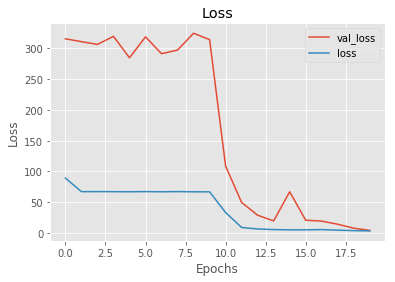

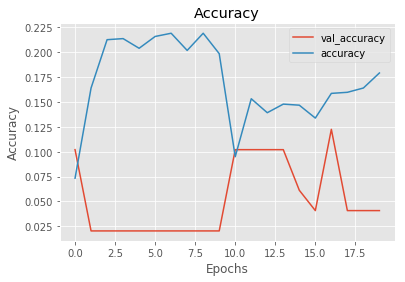

In [42]:
visualize_training_results(res)

### Visualizing the Predictions

[29.73177  29.578123 29.512747 29.665407 29.510012 29.829779 29.766947
 29.643002 29.950127 29.853573]


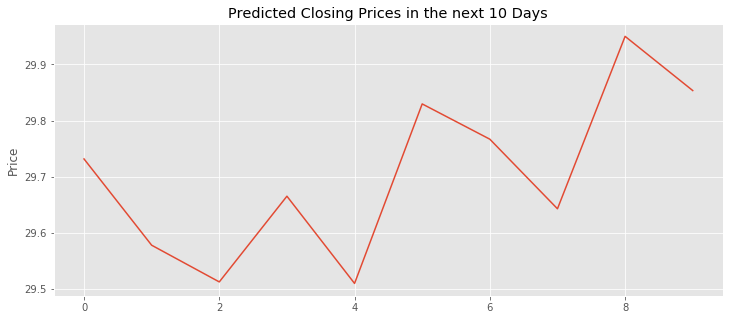

In [43]:
plt.figure(figsize=(12,5))
yhat = model.predict(X[-1].reshape(1, n_per_in, n_features))
print(yhat[0])
plt.plot(yhat[0])
plt.title(f"Predicted Closing Prices in the next {n_per_out} Days")
plt.ylabel("Price")
plt.show()